### 도전과제: 파이썬 가위바위보 프로그램

> 이전 게임 기록: 9승/12무/10패 (총: 31판)
Player: 가위, Computer: 바위 -> [Player 패배]
Player: 바위, Computer: 바위 -> [무승부]
[INPUT ERROR] '가위/바위/보' 중 하나를 정확히 입력하세요!
Player: 보, Computer: 보 -> [무승부]
Player: 보, Computer: 보 -> [무승부]
Player: 보, Computer: 가위 -> [Player 패배]
Player: 보, Computer: 바위 -> [Player 승리]
Player: 가위, Computer: 바위 -> [Player 패배]
Player: 바위, Computer: 가위 -> [Player 승리]


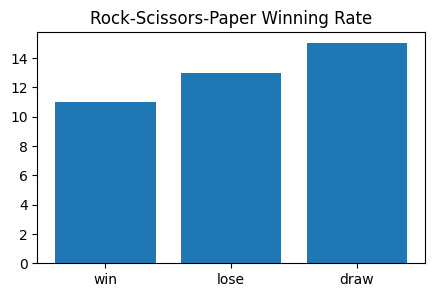

> 현재까지 승률: 28.21%
Player: 가위, Computer: 바위 -> [Player 패배]
Player: 바위, Computer: 보 -> [Player 패배]
Player: 보, Computer: 바위 -> [Player 승리]
> 현재까지 플레이 횟수: 42회 (12승/15무/15패)
[END] 게임을 종료합니다... (최종 승률: 28.57%)


In [ ]:
import random, json, os
from matplotlib import pyplot as plt

RPS = ['가위', '바위', '보']
record_file = 'rps_record.json'

# 이전 기록 파일로 불러오기 로직
if os.path.exists(record_file):
    with open(record_file, 'r') as f:
        data = json.load(f)
        wins = data.get('wins', 0)
        loses = data.get('loses', 0)
        draws = data.get('draws', 0)
        count = wins + loses + draws
        
    print(f"> 이전 게임 기록: {wins}승/{draws}무/{loses}패 (총: {count}판)")    

else:
    wins, loses, draws = 0, 0, 0
    count = 0

while True:
    player_input = input("가위/바위/보 중 하나를 입력하세요 (종료하려면 '종료' 입력): ")
    computer_input = random.choice(RPS)
    show_info = f'Player: {player_input}, Computer: {computer_input} -> '

    try:
        # 게임 종료하기 로직
        if player_input == '종료':
            print(f'> 현재까지 플레이 횟수: {count}회 ({wins}승/{draws}무/{loses}패)')
            if count > 0:
                print(f'[END] 게임을 종료합니다... (최종 승률: {((wins / count) * 100):.2f}%)')
            else:
                print('[END] 게임을 종료합니다... (게임 진행 X)')

            # 기록 저장 로직
            with open(record_file, 'w') as f:
                json.dump({'wins': wins, 'loses': loses, 'draws': draws}, f)
            break

        # 승률 확인 로직
        elif player_input == '승률':
            if count > 0:
                # 승률 그래프 시각화 추가
                plt.figure(figsize=(5, 3))
                plt.bar(['win', 'lose', 'draw'], [wins, loses, draws])
                plt.title('Rock-Scissors-Paper Winning Rate')
                plt.show()
                
                print(f'> 현재까지 승률: {((wins / count) * 100):.2f}%')
            else:
                print('아직 게임을 진행한 적이 없습니다!')
            continue

        # 게임 진행 로직
        elif player_input == computer_input:
            count += 1
            draws += 1
            print(show_info + '[무승부]')

        elif player_input == '가위':
            count += 1
            if computer_input == '바위':
                loses += 1
                print(show_info + '[Player 패배]')
            elif computer_input == '보':
                wins += 1
                print(show_info + '[Player 승리]')

        elif player_input == '바위':
            count += 1
            if computer_input == '보':
                loses += 1
                print(show_info + '[Player 패배]')
            elif computer_input == '가위':
                wins += 1
                print(show_info + '[Player 승리]')

        elif player_input == '보':
            count += 1
            if computer_input == '가위':
                loses += 1
                print(show_info + '[Player 패배]')
            elif computer_input == '바위':
                wins += 1
                print(show_info + '[Player 승리]')
    
        else: # 입력값 예외 처리
            raise ValueError('[INPUT ERROR]')

    except Exception as err:
        print(err, "'가위/바위/보' 중 하나를 정확히 입력하세요!")
